##Empirical Project Final - Grace Gerow 

Looking at current events in the United States and around the world, I wanted to focus on women’s healthcare rights as it is a very salient topic nowadays. My question is: How does investment or lack of investment in women’s healthcare contribute to the economic growth of emerging and developed countries? Another way to phrase the question could be, how does restriction or lack of restriction on women’s healthcare contribute to the economic growth of countries? 
Women’s health is often overlooked in economic discussion and has become a very politicized topic in certain countries. However, researching the topic from a purely economic standpoint could allow us to find the unbiased effect of investment in women’s health and the impact it has on the economy. As mentioned in week 5, health and education also overlap when looking at human capital. This could be another lens to look at the problem through, and also speaks to how many variables health effects. Thinking on what we have learned so far, there are many ways to apply this question to our formulas and theories. Looking at the first recipe we learned, the production function, through data we could discover if a lack of women’s healthcare investment leads to a smaller labor force. It could be that women are not able to reach the level of education they need to work, that the lack of healthcare access causes them to have a higher chance of illness (specifically illnesses limited to only women such as breast cancer, ovarian cysts or cancer, etc.), or that a lack of access to women’s healthcare results in a larger amount of unplanned pregnancies possibly resulting in them becoming non-labor force child carers reliant on one source of income. A smaller work force could result in lower overall production, leading to a lower amount of domestic goods produced (GDP). Furthermore when looking at unplanned pregnancies or lack of birth control access, the population who is unable to work or non-non labor force (in this case children under 16) could become disproportionately high. Looking ahead at chapter 4, there seems to be a correlation with land/geography and birth rates as well, possibly impacting the economic growth of a country.
Yes, I believe I will be able to draw a DAG. The example in the DAG link in week 2 modules using family background to link education, earnings, and children’s future earning is similar to how I imagine my DAG will look. I expect healthcare access, fertility rates, and other factors to be underlying causes connected to labor force or a third variable. Since this is a broad topic, I believe I need to narrow down my data to either certain geographical regions with varying labor force sizes, economic growth rates, and fertility rates to tie in the effect of population and land, or to countries with limited access to women’s healthcare vs. countries with less restricted access. I plan to use the SMU economics database to find this information. Furthermore, I plan to write my empirical project as a paper, as well as a slide show for my presentation. Seeing as the data and analysis portion of the project is due relatively soon, I hope to have a rough draft by the time that is due (October 23rd). That will give me ample time to edit and polish my final draft.




In [12]:
# Basic Packages
from __future__ import division
import os
from datetime import datetime

# Web & file access
import requests
import io

# Import display options for showing websites
from IPython.display import IFrame, HTML

In [13]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%pylab --no-import-all
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

import plotly.express as px
import plotly.graph_objects as go

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# Next line can import all of plotnine, but may overwrite things? Better import each function/object you need
#from plotnine import *

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [14]:
# Data
import pandas as pd
import numpy as np
from pandas_datareader import data, wb

# GIS & maps
import geopandas as gpd
gp = gpd
import georasters as gr
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import textwrap

In [15]:
# Data Munging
from itertools import product, combinations
import difflib
import pycountry
import geocoder
from geonamescache.mappers import country
mapper = country(from_key='name', to_key='iso3')
mapper2 = country(from_key='iso3', to_key='iso')
mapper3 = country(from_key='iso3', to_key='name')

# Regressions & Stats
from scipy.stats import norm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer, LineLocation

In [16]:
# Paths
pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In order to explore my empirical project question, I gathered world data from the WDI. Using the health, education, gender, and economy and growth categories, I collected data from each section to attempt to answer this question. Below I have listed all the indicators I have collected, though I do not use them all. Using these indicators will allow me to explore the various different variables that contribute to reproductive health care access, fertility rates, population growth, and GDP per capita. I preformed regression analyses with world data provided, to create correlations between these variables. However, some of the more specific indicators did not have world data available, and in these cases I created a series of maps in an attempt to find correlations. 

In [17]:
currentYear = datetime.now().year
year = min(2020, currentYear-2)

In [18]:
wbcountries = wb.get_countries()

wbcountries['name'] = wbcountries.name.str.strip()
wbcountries['incomeLevel'] = wbcountries['incomeLevel'].str.title()
wbcountries.loc[wbcountries.iso3c=='VEN', 'incomeLevel'] = 'Upper Middle Income'

SP.POP.0014.TO.ZS = % Population 0-14
SL.TLF.TOTL.FE.ZS = Total female LF
SE.XPD.TOTL.GD.ZS = Gov. expenditure on education, % total of GDP
SL.TLF.TOTL.IN = Labor Force Total 
SE.ADT.1524.LT.ZS = Youth literacy rate 0-14 %
SP.ADO.TFRT = Adolescent fertility rate (15-19)
SP.DYN.CONU.ZS = Contraceptive prevalence, any method, married women 15-49
IC.FRM.FEMO.ZS = Firms with female participation in ownership 
SL.TLF.CACT.FE.ZS = Labor force participation, women 15+
SH.STA.ANVC.ZS = Pregnant women receiving prenatal care 
SG.TIM.UWRK.FE = Proportion of time spent on unpaid domestic care and work, women 
SP.MTR.1519.ZS = Teenage mothers (have child or pregnant), 15-19
SH.STA.BRTC.ZS = Births attended by skilled health staff 
SL.FAM.WORK.FE.ZS = Contributing family workers, female 
SP.DYN.TFRT.IN = Fertility rate, total births per woman 
SP.DYN.LE00.FE.IN = Life expectancy at birth, female 
SH.STA.MMRT = Maternal mortality ratio 
SL.UEM.TOTL.FE.ZS = Unemployment, female
SG.DMK.SRCR.FN.ZS = Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care, 15-49
SP.ADO.TFRT = Adolescent fertility rate, 15-19
SP.DYN.CBRT.IN = Birth rate, crude 
SH.DTH.COMM.ZS = Cause of death, by communicable disease and maternal, prenatal and nutritional conditions
SP.DYN.TFRT.IN = Fertility rate, births per woman 
SP.DYN.LE00.FE.IN = Life expectancy at birth, female 
SP.DYN.LE00.IN = Life expectancty at birth, total 
SH.STA.ANVC.ZS = Pregnant women receiving prenatal care
SP.POP.TOTL.FE.ZS = Population total, female 
SN.ITK.DEFC.ZS = Prevalence of undernurishment, total 
SH.SVR.WAST.ZS = Prevalence of severe wasting, children under 5
SH.STA.WAST.ZS = Prevalence of wasting, weight to height, children under 5 
SH.SGR.IRSK.ZS = Risk of impoverishing expenditure for surgical care, people at risk 
SP.MTR.1519.ZS = Teenage mothers, were pregnant or currently
SP.DYN.CONU.ZS = Contraceptive prevelance, any method, married women 15-49
SH.STA.MMRT = Maternal mortality ratio
SP.DYN.IMRT.IN = Mortality rate, infant 
SH.DYN.MORT = Mortality rate, under 5
SH.STA.STNT.ZS = Prevalence of stunting, height to age, children under 5
SH.STA.MALN.ZS = Prevalence of underweight, weight to age, children under 5
SP.UWT.TFRT = Unment need for contraception, married women 15-49 
NY.GDP.PCAP.KD.ZG = GDP per cap. growth, annual 
SL.TLF.ACTI.ZS = Labor Force %
SH.MED.BEDS.ZS = Hospital Beds 
SH.XPD.PVTD.PP.CD = Domestic private health expenditure per capita
SH.XPD.GHED.PC.CD = Domestic general government health expenditure per capita
SH.MED.CMHW.P3 = Community health workers
SH.XPD.GHED.GD.ZS = Domestic general government health expenditure (% of GDP)

In [105]:
wdi_indicators = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.PCAP.KD', 'SL.GDP.PCAP.EM.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.DYN.WFRT', 'SP.DYN.TFRT.IN', 'NY.GDP.PCAP.KD.ZG','SP.POP.0014.TO.ZS','SL.TLF.TOTL.FE.ZS','SE.XPD.TOTL.GD.ZS','SL.TLF.TOTL.IN','SE.ADT.1524.LT.ZS','SP.DYN.CONU.ZS','IC.FRM.FEMO.ZS','SL.TLF.CACT.FE.ZS','SH.STA.ANVC.ZS','SG.TIM.UWRK.FE','SP.MTR.1519.ZS','SH.STA.BRTC.ZS','SL.FAM.WORK.FE.ZS','SP.DYN.TFRT.IN','SP.DYN.LE00.FE.IN','SH.STA.MMRT','SL.UEM.TOTL.FE.ZS','SG.DMK.SRCR.FN.ZS','SP.ADO.TFRT','SP.DYN.CBRT.IN','SH.DTH.COMM.ZS','SP.DYN.TFRT.IN','SP.DYN.LE00.FE.IN','SP.DYN.LE00.IN','SP.POP.TOTL.FE.ZS','SN.ITK.DEFC.ZS','SH.SVR.WAST.ZS','SH.STA.WAST.ZS','SH.SGR.IRSK.ZS','SP.MTR.1519.ZS','SP.DYN.CONU.ZS','SH.STA.MMRT','SP.DYN.IMRT.IN','SH.DYN.MORT','SH.STA.STNT.ZS','SH.STA.MALN.ZS','SP.UWT.TFRT','NY.GDP.PCAP.KD.ZG','SL.TLF.ACTI.ZS','SH.STA.ANVC.ZS','SH.MED.BEDS.ZS','SH.XPD.GHED.PC.CD','SH.MED.CMHW.P3','SH.XPD.GHED.GD.ZS']

In [106]:
popvars = wb.search(string='population')
popvars.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
24,1.1_ACCESS.ELECTRICITY.TOT,Access to electricity (% of total population),,Sustainable Energy for All,Access to electricity is the percentage of pop...,b'World Bank Global Electrification Database 2...,
39,1.2_ACCESS.ELECTRICITY.RURAL,Access to electricity (% of rural population),,Sustainable Energy for All,Access to electricity is the percentage of rur...,b'World Bank Global Electrification Database 2...,
40,1.3_ACCESS.ELECTRICITY.URBAN,Access to electricity (% of urban population),,Sustainable Energy for All,Access to electricity is the percentage of tot...,b'World Bank Global Electrification Database 2...,
164,2.1_ACCESS.CFT.TOT,Access to Clean Fuels and Technologies for coo...,,Sustainable Energy for All,,b'',
195,3.11.01.01.popcen,Population census,,Statistical Capacity Indicators,"Population censuses collect data on the size, ...",b'World Bank Microdata library. Original sourc...,


In [107]:
wdi = wb.download(indicator=wdi_indicators, country=wbcountries.iso2c.values, start=1950, end=year)
wdi = wdi.reset_index()
wdi['year'] = wdi.year.astype(int)
wdi['gdp_pc'] = wdi['NY.GDP.PCAP.PP.KD']
wdi['ln_gdp_pc'] = wdi['NY.GDP.PCAP.PP.KD'].apply(np.log)
wdi['ln_pop'] = wdi['SP.POP.TOTL'].apply(np.log)
wdi.head()

/opt/anaconda3/envs/MyTest/lib/python3.9/site-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6F, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, M1, M2, N6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZH, ZI, ZJ, ZQ, ZT


,country,year,NY.GDP.PCAP.PP.KD,NY.GDP.PCAP.KD,SL.GDP.PCAP.EM.KD,SP.POP.GROW,SP.POP.TOTL,SP.DYN.WFRT,SP.DYN.TFRT.IN,NY.GDP.PCAP.KD.ZG,...,SH.STA.MALN.ZS,SP.UWT.TFRT,SL.TLF.ACTI.ZS,SH.MED.BEDS.ZS,SH.XPD.GHED.PC.CD,SH.MED.CMHW.P3,SH.XPD.GHED.GD.ZS,gdp_pc,ln_gdp_pc,ln_pop
0,Aruba,2020,29563.756955,23026.332866,NaN,0.428017,106766.0,NaN,1.901,-22.650725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29563.756955,10.294304,11.578395
1,Aruba,2019,38221.117314,29769.293907,NaN,0.437415,106310.0,NaN,1.901,-2.512957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38221.117314,10.551143,11.574115
2,Aruba,2018,39206.356147,30536.667193,NaN,0.459266,105846.0,NaN,1.896,0.803198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39206.356147,10.576594,11.569740
3,Aruba,2017,38893.960556,30293.351539,NaN,0.471874,105361.0,NaN,1.886,4.985800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38893.960556,10.568594,11.565148
4,Aruba,2016,37046.877414,28854.713299,NaN,0.502860,104865.0,NaN,1.872,1.604501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37046.877414,10.519939,11.560429


In [108]:
wdi = wbcountries.merge(wdi, left_on='name', right_on='country')
wdi.head()

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,...,SH.STA.MALN.ZS,SP.UWT.TFRT,SL.TLF.ACTI.ZS,SH.MED.BEDS.ZS,SH.XPD.GHED.PC.CD,SH.MED.CMHW.P3,SH.XPD.GHED.GD.ZS,gdp_pc,ln_gdp_pc,ln_pop
0,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29563.756955,10.294304,11.578395
1,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38221.117314,10.551143,11.574115
2,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39206.356147,10.576594,11.569740
3,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38893.960556,10.568594,11.565148
4,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37046.877414,10.519939,11.560429


In [109]:
dffig = wdi.loc[wdi.year==year]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SP.POP.TOTL'])\
            .sort_values(by='region').reset_index()

##Establishing Solow's Growth Model 

There are many layers to the question of how access or restriction to women’s healthcare affects countries economic growth or lack of economic growth. First, starting with the most basic information, I have created a regression model of GDP per Capita and Population Growth rate from downloaded WDI data. I then created a function to map the regression between these two variables.

In [96]:
def my_xy_plot(dfin, 
               x='SP.POP.GROW', 
               y='gdp_pc', 
               labelvar='iso3c', 
               dx=0.006125, 
               dy=0.006125, 
               xlogscale=False, 
               ylogscale=False,
               xlabel='Growth Rate of Population', 
               ylabel='Log[Income per capita in ' +  str(year) + ']',
               labels=False,
               xpct = False,
               ypct = False,
               OLS=False,
               OLSlinelabel='OLS',
               ssline=False,
               sslinelabel='45 Degree Line',
               filename='income-pop-growth.pdf',
               hue='region',
               hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                          'Latin America & Caribbean ', 'Middle East & North Africa',
                          'North America', 'South Asia', 'Sub-Saharan Africa '],
               style='incomeLevel', 
               style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
               palette=None,
               size=None,
               sizes=None,
               legend_fontsize=10,
               label_font_size=12,
               save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels.
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.scatterplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    #hue='incomeLevel',
                    #hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    #hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                    #           'Latin America & Caribbean ', 'Middle East & North Africa',
                    #           'North America', 'South Asia', 'Sub-Saharan Africa '],
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                    size=size,
                    sizes=sizes,
                    #palette=sns.color_palette("Blues_r", df[hue].unique().shape[0]+6)[:df[hue].unique().shape[0]*2:2],
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_font_size, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!=hue) & (labels!=style) & (labels!=size)])
    labels = list(labels[(labels!=hue) & (labels!=style) & (labels!=size)])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

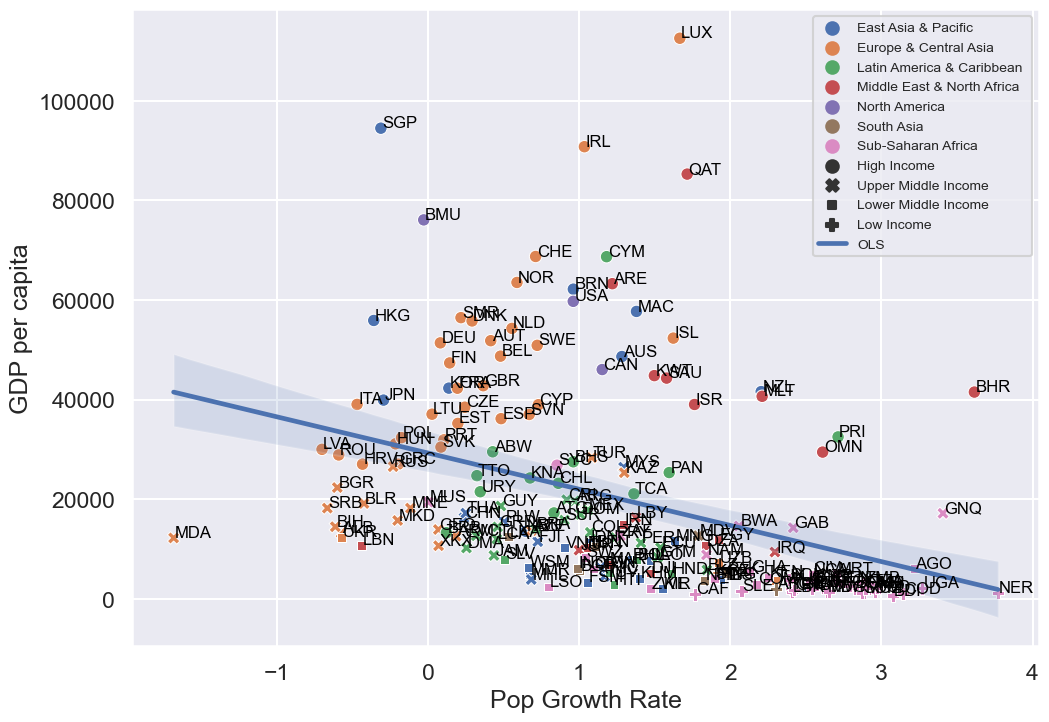

In [28]:
g = my_xy_plot(dffig, 
               x='SP.POP.GROW', 
               y='gdp_pc', 
               xlabel='Pop Growth Rate', 
               ylabel='GDP per capita', 
               OLS=True, 
               labels=True, 
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='pop-growth-gdp-pc.pdf')

From this regression, we are able to see the negative correlation between fast growing populations and GDP per capita. This supports the theory of the Solow Model of Population. In this model, there are two drivers to lower population: mortality transition and fertility transition. Both of these transitions refer to ways populations are able to control and limit fertility. However, as cited in the model, development is the best contraceptive. Development is associated with lower mortality, which in turn lowers the fertility rate, and higher cost of children which also lowers the fertility rate. In more developed countries, people lean towards the idea of Quantity-Quality Trade-Off, meaning they would prefer fewer quality children as opposed to more children in general. Looking at this model, we can see this theory play out as GDP per capita and population growth rate have a negative correlation.  Further strengthening Solow’s idea of “development as the best contraceptive,” there is a congregation of high-income countries around the same area on the graph. The high-income countries tend to fall between 0-1.5% population growth rate, and GDP per capita varies but lies above the regression line. On the other hand, we see low-income countries fall under the regression line (lower GDP per capita) and the right of the graph (high population growth rates).

In [15]:
dffig = wdi.loc[wdi.year==year]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SP.DYN.TFRT.IN'])\
            .sort_values(by='region').reset_index()

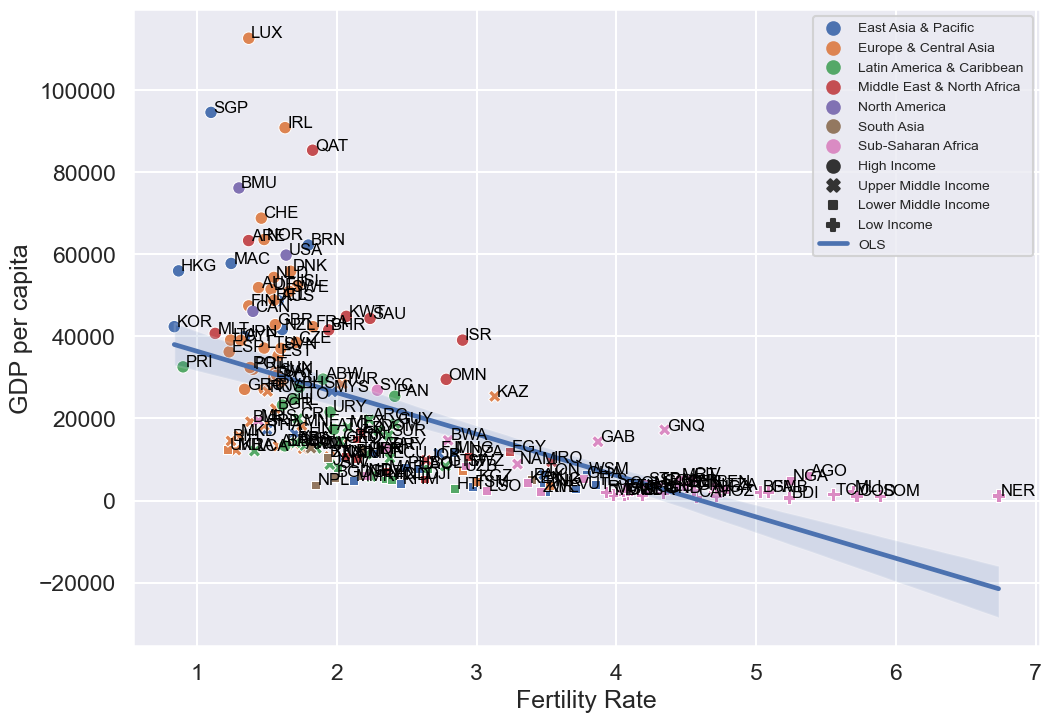

In [16]:
g = my_xy_plot(dffig, 
               x='SP.DYN.TFRT.IN', 
               y='gdp_pc', 
               xlabel='Fertility Rate', 
               ylabel='GDP per capita', 
               OLS=True, 
               labels=True, 
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='fertility-gdp-pc.pdf')

I have repeated this regression using the same code, but a different x-variable, Total Fertility Rate. This regression graph shows the negative relationship between GDP per capita and fertility rates, further strengthening the Solow Model of Population Growth. Again, we see the collection of high-income countries above the regression line and with fertility rates of 1-2, and low-income countries falling below the regression line with high fertility rate of 4+.

###Supporting Figures

Below I also show this data in line graph form. In these graphs, we can see the countries with high GDP per capita at the top of the first graph, fall in the second graph representing their low population growth rates. We also see the same negative correlation with low-income countries. 

In [17]:
def my_xy_line_plot(dfin, 
                    x='year', 
                    y='gdp_pc', 
                    labelvar='iso3c', 
                    dx=0.006125, 
                    dy=0.006125, 
                    xlogscale=False, 
                    ylogscale=False,
                    xlabel='Growth Rate of Population', 
                    ylabel='Log[Income per capita in ' +  str(year) + ']',
                    labels=False,
                    xpct = False,
                    ypct = False,
                    OLS=False,
                    OLSlinelabel='OLS',
                    ssline=False,
                    sslinelabel='45 Degree Line',
                    filename='income-pop-growth.pdf',
                    hue='region',
                    hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                               'Latin America & Caribbean ', 'Middle East & North Africa',
                               'North America', 'South Asia', 'Sub-Saharan Africa '],
                    style='incomeLevel', 
                    style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    palette=None,
                    legend_fontsize=10,
                    label_fontsize=12,
                    loc=None,
                    save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels. 
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.lineplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_fontsize, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!='region') & (labels!='incomeLevel')])
    labels = list(labels[(labels!='region') & (labels!='incomeLevel')])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize, loc=loc)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

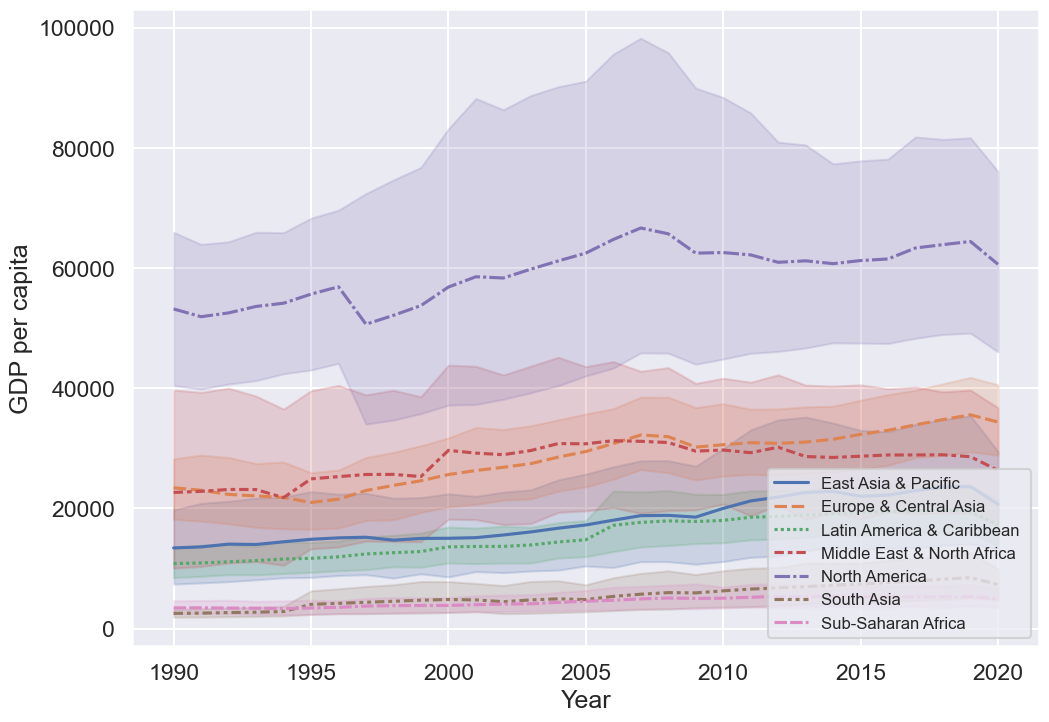

In [18]:
fig = my_xy_line_plot(wdi, 
                      x='year', 
                      y='gdp_pc', 
                      xlabel='Year',
                      ylabel='GDP per capita',
                      ylogscale=False,
                      filename='ln-gdp-pc-regions-TS.pdf',
                      style='region',
                      style_order=['East Asia & Pacific', 'Europe & Central Asia',
                                   'Latin America & Caribbean ', 'Middle East & North Africa',
                                   'North America', 'South Asia', 'Sub-Saharan Africa '],
                      #palette=palette,
                      OLS=False, 
                      labels=False,
                      legend_fontsize=12,
                      loc='lower right',
                      save=True)

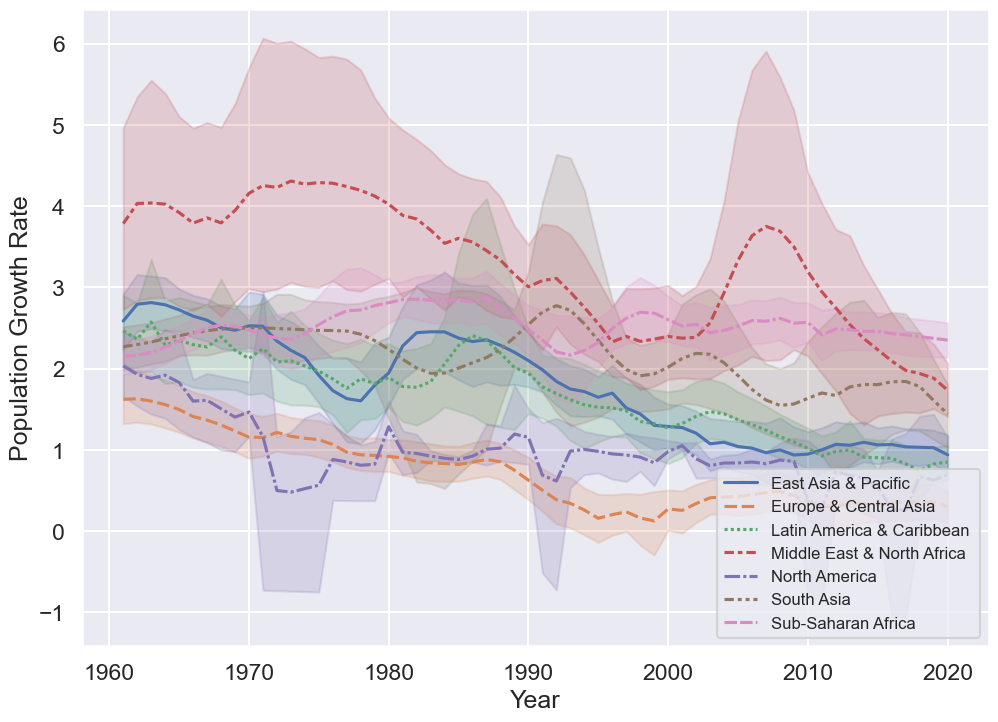

In [20]:
fig = my_xy_line_plot(wdi, 
                      x='year', 
                      y='SP.POP.GROW', 
                      xlabel='Year',
                      ylabel='Population Growth Rate',
                      ylogscale=False,
                      filename='ln-gdp-pc-regions-TS.pdf',
                      style='region',
                      style_order=['East Asia & Pacific', 'Europe & Central Asia',
                                   'Latin America & Caribbean ', 'Middle East & North Africa',
                                   'North America', 'South Asia', 'Sub-Saharan Africa '],
                      #palette=palette,
                      OLS=False, 
                      labels=False,
                      legend_fontsize=12,
                      loc='lower right',
                      save=True)

##Contraceptive Prevalence

By establishing the negative correlations between GDP per capita, fertility rates, and population growth rates we can now explore factors which contribute to these rates. The first variable I explore is contraceptive availability. The variables in these graphs were listed in the health and gender categories of the WDI. 

In [34]:
dffig = wdi.loc[wdi.year==2018]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SP.DYN.CONU.ZS','SP.DYN.TFRT.IN'])\
            .sort_values(by='region').reset_index()

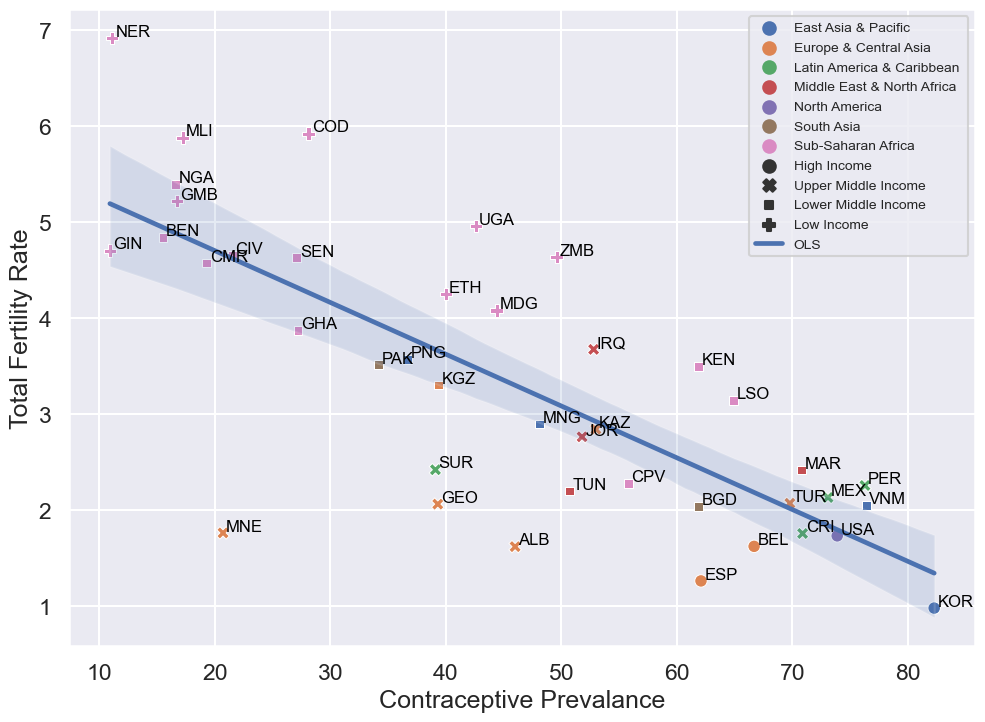

In [35]:
g = my_xy_plot(dffig, 
               x='SP.DYN.CONU.ZS', 
               y='SP.DYN.TFRT.IN', 
               xlabel='Contraceptive Prevalance', 
               ylabel='Total Fertility Rate', 
               OLS=True, 
               labels=True, 
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='ln-gdp-pc-ln-pop.pdf')

In this first graph, the regression shows the relationship between total fertility rates and contraceptive prevalence. Defined by the WDI, contraceptive prevalence is the percentage of married women ages 15-49 who have access and use any method of contraceptive. Looking at this graph, we see a strong negative correlation between the two variables. Similar to the GDP per capita and fertility rate graph, there are also congregations of similar countries. In this regression we can see many low and lower middle-income countries with high fertility rates (average around 4) and low contraceptive prevalence (less than 50%). Looking at the other half of the graph, we see more high and upper middle-income countries with high contraceptive prevalence and low total fertility rates. This graph establishes the importance of contraception to controlling the fertility rate.

However, as discussed in class this prevalence could be due to a multitude of variables. Desired fertility, health care infrastructure, and culture all could contribute to the accessibility of contraception. The next graph looks at the unmet need for contraception, which allows us to see what percent of the population is being underserved in terms of a need. This eliminates culture and desired fertility as possible variables. 

In [41]:
dffig = wdi.loc[wdi.year==2018]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SP.DYN.CONU.ZS','SP.DYN.TFRT.IN','SP.UWT.TFRT'])\
            .sort_values(by='region').reset_index()

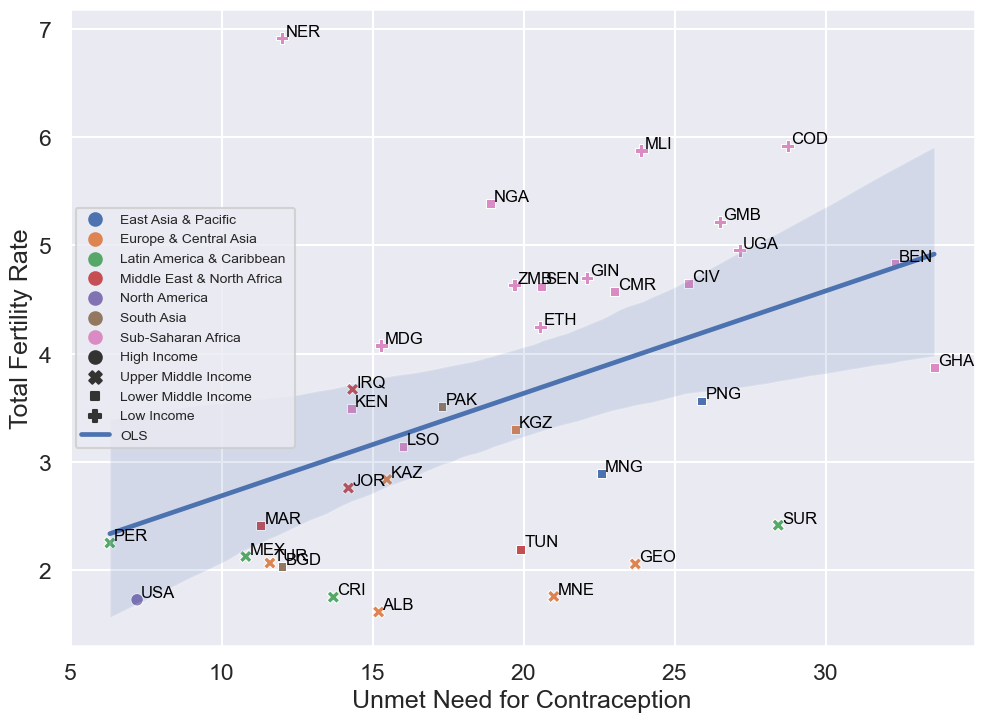

In [43]:
g = my_xy_plot(dffig, 
               x='SP.UWT.TFRT', 
               y='SP.DYN.TFRT.IN', 
               xlabel='Unmet Need for Contraception', 
               ylabel='Total Fertility Rate', 
               OLS=True, 
               labels=True, 
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='ln-gdp-pc-ln-pop.pdf')

Looking at this regression, we are able to see a strong positive correlation between unmet need for contraception for married women ages 15-49 and total fertility rate. Furthermore, we also see a correlation to the previous graph with low to lower middle-income countries being the most underserved with high fertility rates, and upper middle to high income countries having smaller unmet needs and lower fertility rates. I also show this regression in another form with GDP per capita as the y-variable and unmet need for contraception as the x-variable. Here we can see a negative correlation between the two and the same congregation of low-income countries with high population rates. 

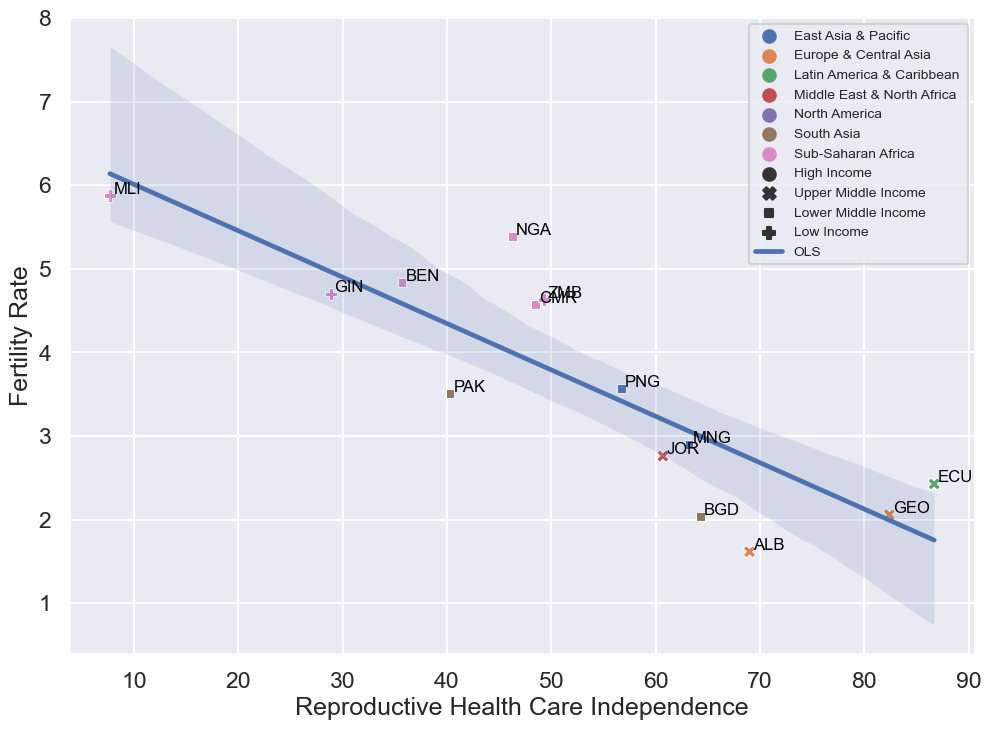

In [136]:
g = my_xy_plot(dffig, 
               x='SG.DMK.SRCR.FN.ZS', 
               y='SP.DYN.TFRT.IN', 
               xlabel='Reproductive Health Care Independence', 
               ylabel='Fertility Rate', 
               OLS=True, 
               labels=True, 
               #size="SP.POP.GROW", 
               #sizes=(10, 400), 
               filename='reproductive-health-care-independence-log-gdp-pc.pdf')

Another variable looked at in this category is reproductive health care independence. The WDI defines this indicator as “women making their own informed decisions regarding sexual relations, contraceptive us and reproductive health (% of women 15-49).” While this data is not available at a world level, using the data points they have, we are able to see a strong negative correlation between reproductive health care independence and fertility rate. Again, we see the collection of upper middle-income countries with high rates of reproductive health care independence and low fertility rates, and lower middle income/low-income countries with low levels of reproductive health care independence and high fertility rates. 

In [90]:
dffig = wdi.loc[wdi.year==2019]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SP.ADO.TFRT',])\
            .sort_values(by='region').reset_index()

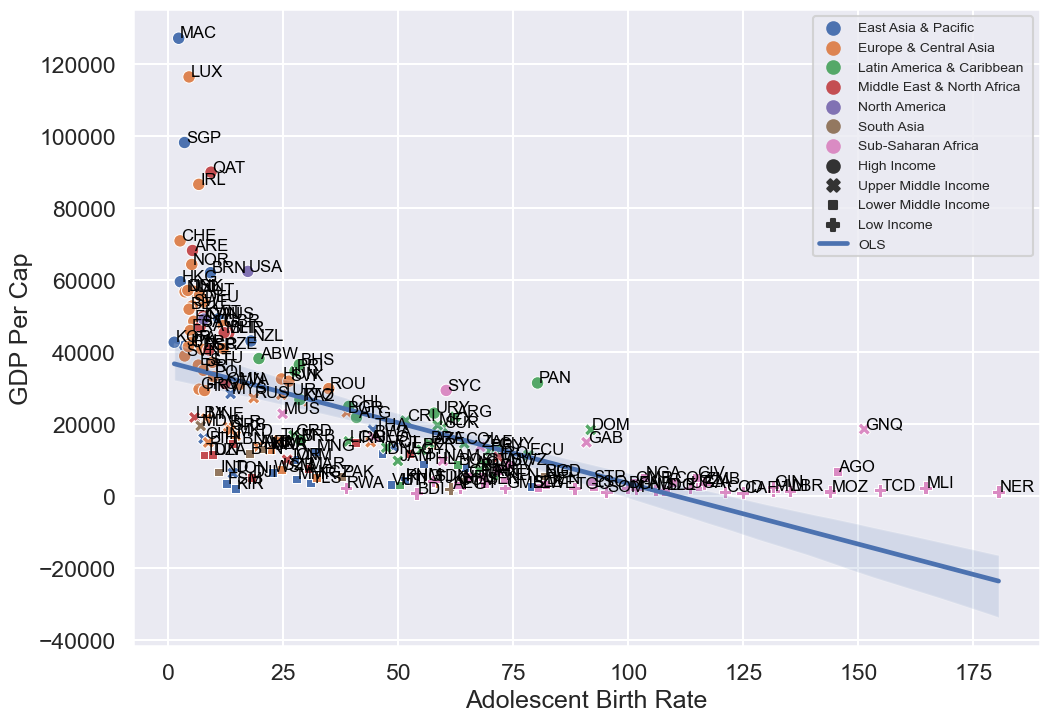

In [92]:
g = my_xy_plot(dffig, 
               x='SP.ADO.TFRT', 
               y='gdp_pc', 
               xlabel='Adolescent Birth Rate', 
               ylabel='GDP Per Cap', 
               OLS=True, 
               labels=True, 
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='ln-gdp-pc-ln-pop.pdf')

Finally, the last variable in this category I looked at was adolescent birth rate. The WDI focuses on married women in terms of contraception access, however they are not the only women in need of contraception. I did a research project in a previous class on United States reproductive healthcare policies, and one discussion point was availability of contraception to adolescents. While the WDI does not have this data available, it can be seen that a high adolescent birth rate is associated with low GDP per capita and high population growth rates. 

##Maternal and Child Healthcare

As mentioned before, high fertility rates and low contraceptive prevalence could be due to many variables such as healthcare infrastructure, desired fertility rate, and culture. Furthermore, fertility and contraception are just one aspect of women’s health. In chapter 5, we learned how health, education, and income affect human capital; ultimately affecting economic growth. In this section, I look at healthcare infrastructure with a focus on maternal healthcare. Maternal care and childcare factors into women being able to participate in the work force post-birth, and the development of their child or children. Furthermore, A lack of health care infrastructure could explain why contraceptives are not available, as it takes infrastructure and resources to supply these, and also show underserved populations in terms of women’s healthcare. 

In [138]:
dffig = wdi.loc[wdi.year==2019]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SP.DYN.TFRT.IN','SH.XPD.GHED.GD.ZS','SP.POP.TOTL.FE.ZS'])\
            .sort_values(by='region').reset_index()

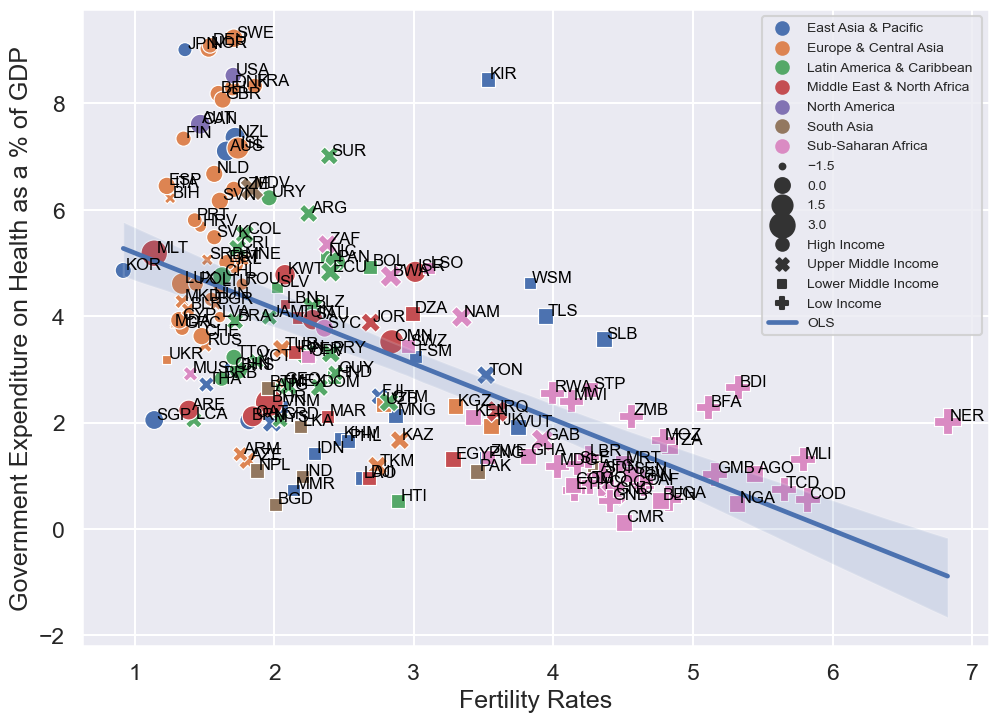

In [139]:
g = my_xy_plot(dffig, 
               x='SP.DYN.TFRT.IN', 
               y='SH.XPD.GHED.GD.ZS', 
               xlabel='Fertility Rates', 
               ylabel='Government Expenditure on Health as a % of GDP', 
               OLS=True, 
               labels=True, 
               size="SP.POP.GROW", 
               sizes=(10, 400), 
               filename='unpaid-childcare-log-gdp-pc.pdf')

First looking at high-level healthcare infrastructure, I created a regression showing government health expenditure as a % of GDP and fertility rates. In this graph we see a strong negative correlation between fertility rates and percentage of domestic health expenditure. In this graph we see high-income countries with low fertility rates spend the most on domestic healthcare. As we move down the regression line, we see income and health expenditure fall, while fertility rates rise. This could be due to a multitude of variables, but is a good place to start when looking at the data.

In [158]:
dffig = wdi.loc[wdi.year==2018]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SH.STA.ANVC.ZS','SP.DYN.TFRT.IN'])\
            .sort_values(by='region').reset_index()

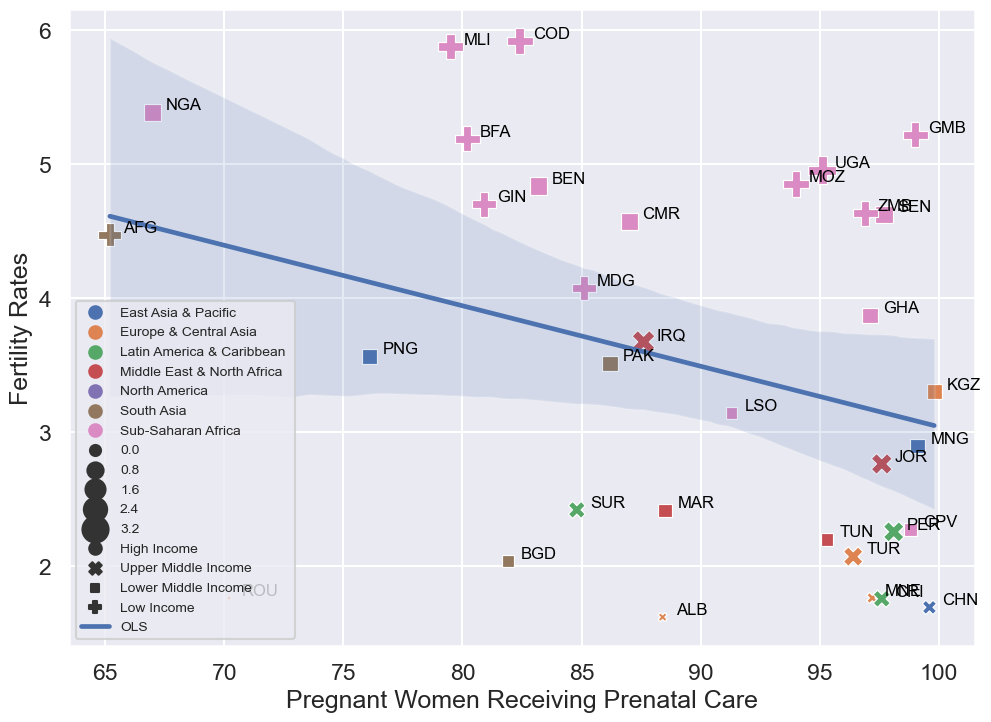

In [159]:
g = my_xy_plot(dffig, 
               x='SH.STA.ANVC.ZS', 
               y='SP.DYN.TFRT.IN', 
               xlabel='Pregnant Women Receiving Prenatal Care', 
               ylabel='Fertility Rates', 
               OLS=True, 
               labels=True, 
               size="SP.POP.GROW", 
               sizes=(10, 400), 
               filename='unpaid-childcare-log-gdp-pc.pdf')

The next regression shows the relationship between fertility rates and percentage of women with prenatal care. While again here we see a similar pattern showing high fertility and low-income countries with low maternal healthcare, we also begin see outliers. Some upper middle-income countries have relatively low prenatal care percentages such as Iraq, Suriname, and Albania. Looking back at the previous graph showing percentage of health expenditure, Suriname was one of the countries with the highest expenditure percentage. While other countries may face this problem due to lack of healthcare infrastructure, these outliers point to possible biases in women’s healthcare.

In [166]:
dffig = wdi.loc[wdi.year==2009]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SH.MED.BEDS.ZS','SP.DYN.TFRT.IN'])\
            .sort_values(by='region').reset_index()

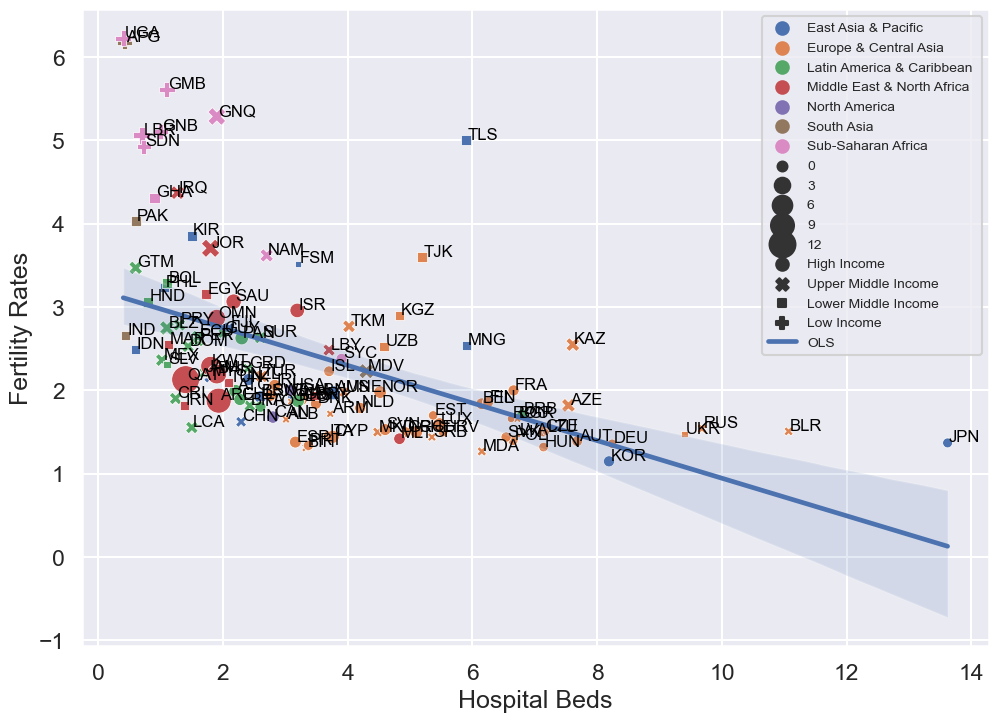

In [167]:
g = my_xy_plot(dffig, 
               x='SH.MED.BEDS.ZS', 
               y='SP.DYN.TFRT.IN', 
               xlabel='Hospital Beds', 
               ylabel='Fertility Rates', 
               OLS=True, 
               labels=True, 
               size="SP.POP.GROW", 
               sizes=(10, 400), 
               filename='unpaid-childcare-log-gdp-pc.pdf')

##Looking at the Labor Force 

In [73]:
dffig = wdi.loc[wdi.year==2019]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SL.UEM.TOTL.FE.ZS','SP.DYN.TFRT.IN'])\
            .sort_values(by='region').reset_index()

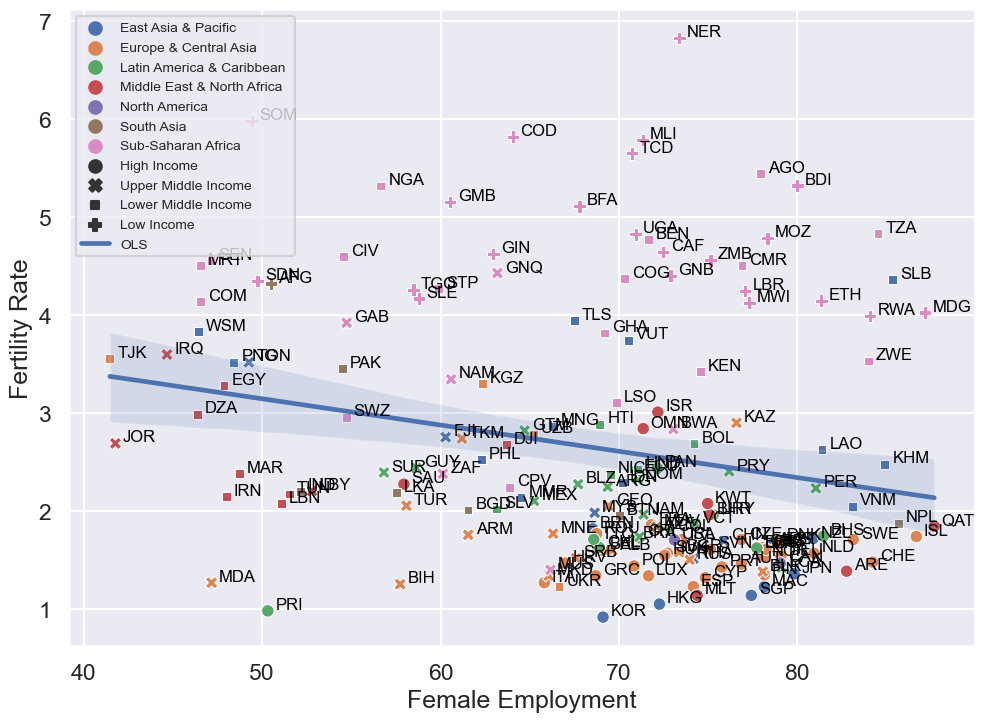

In [74]:
g = my_xy_plot(dffig, 
               x='SL.TLF.ACTI.ZS', 
               y='SP.DYN.TFRT.IN', 
               xlabel='Female Employment', 
               ylabel='Fertility Rate', 
               OLS=True, 
               labels=True, 
               #size="", 
               #sizes=(10, 400), 
               filename='women-in-LF.pdf')

Another possible variable that could influence the relationship between women’s reproductive health care and GDP per capita is the labor force. Looking at the regression between fertility rate and female employment, there is a slight negative correlation. While there are some low-income countries with low female employment, many of them are associated with high female employment. This could be due to income necessity to support their families. Furthermore, we also begin to see upper middle-income countries with low fertility rates and low female employment. This on the other hand suggests a cultural difference as to why there are less women in the labor force.

In [170]:
dffig = wdi.loc[wdi.year==2015]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SP.DYN.TFRT.IN','SG.TIM.UWRK.FE',])\
            .sort_values(by='region').reset_index()

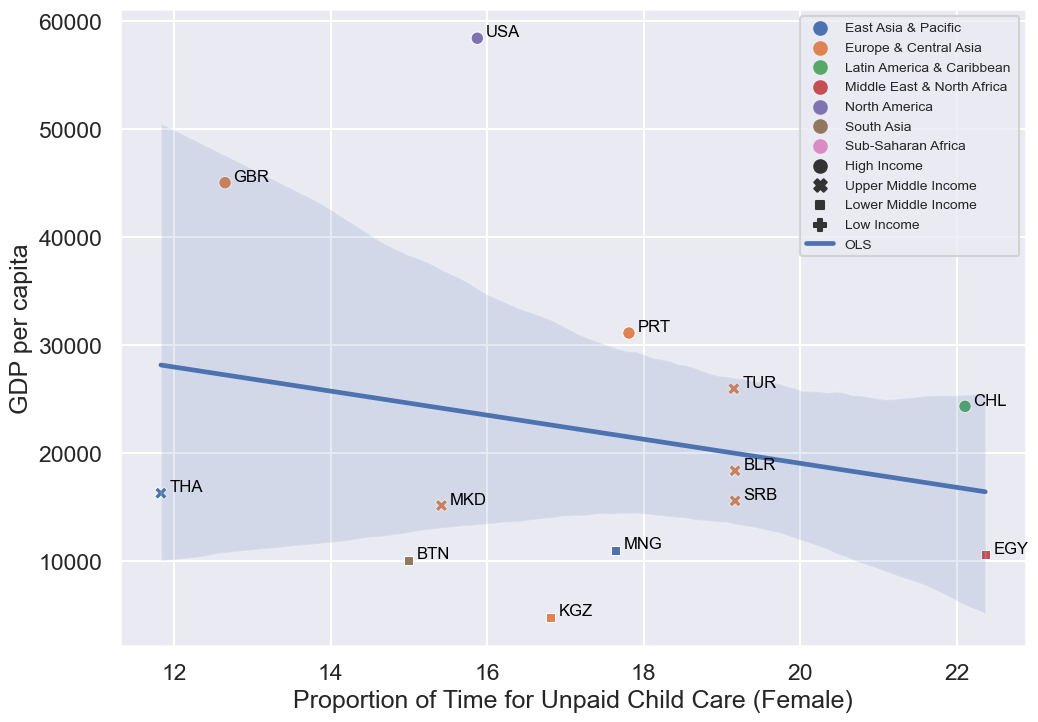

In [171]:
g = my_xy_plot(dffig, 
               x='SG.TIM.UWRK.FE', 
               y='gdp_pc', 
               xlabel='Proportion of Time for Unpaid Child Care (Female)', 
               ylabel='GDP per capita', 
               OLS=True, 
               labels=True, 
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='unpaid-childcare-log-gdp-pc.pdf')

Another possible variable that could influence the relationship between women's reproductive health care and GDP per capita is the proportion of time dedicated to unpaid child care. We can see through this graph (while the WDI did not have world data), the negative correlation between the percentage of 24 hours dedicated to unpaid child care and GDP per capita. One possible reason for this could be that ss women have less access to reproductive health care, whether it be to health care infrastructure, religion, culture, etc., the more children they have and the more time they need to dedicate to those children. As that time rises, the less time in the day there is to dedicate to paid jobs and income, ultimately lowering GDP per capita. However, we do see some outliers such as Chile, which is a high income country but also has a large proportion of time dedicated to unpaid child care. This could be due to cultural norms of women being the main caretaker and men working salaried jobs. Besides Chile, in this graph we most frequently see low income/lower middle income countries having a greater proportion of time for unpaid child care. This could be due to cultural norms as well, but also opens up the connection of reduced access to healthcare having an impact on time spent in a day and family income.  

In [25]:
dffig = wdi.loc[wdi.year==2019]\
            .dropna(subset=['ln_gdp_pc', 'latitude', 'ln_pop', 'gdp_pc','SP.POP.GROW','SP.DYN.TFRT.IN','SL.TLF.TOTL.IN','SL.TLF.TOTL.FE.ZS','SL.TLF.ACTI.ZS'])\
            .sort_values(by='region').reset_index()

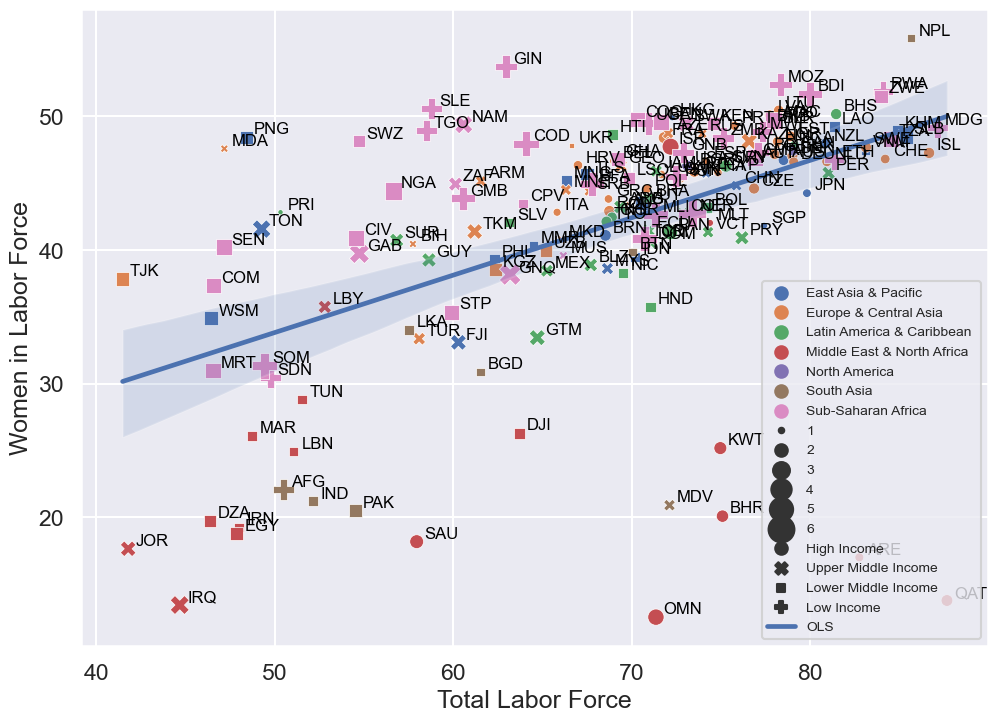

In [26]:
g = my_xy_plot(dffig, 
               x='SL.TLF.ACTI.ZS', 
               y='SL.TLF.TOTL.FE.ZS', 
               xlabel='Total Labor Force', 
               ylabel='Women in Labor Force', 
               OLS=True, 
               labels=True, 
               size="SP.DYN.TFRT.IN", 
               sizes=(10, 400), 
               filename='women-in-LF.pdf')

In an attempt to explore the connection of women in the labor force, sparked by the connection between unpaid child care and lower GDP, this graph shows the proportion of women in the labor to total labor force. While there is a general positive correlation between the two, there are a few outliers that help deduce what variables are at play. Falling below the regresion line are high income countries with low fertility rates. These countries high income statuses lead me to believe the reason for low women in labor force and low fertility rates are due to cultural and societal norms. It is possible men take on the role of working, while women take on the role of child carer. Another trend in this graph are low income countries, with high fertility rates, falling above the regression line. The high percentage of women in the labor force in this case could be due to neccesity of income, to support the high fertility rate. 

##Conclusion